# Chapter 2: Fancy Tricks with Simple Numbers

- Numeric data also need feature engineering
- Sanity check for numeric data: 
    - Whether the magnitude matters. Such as the number of daily visits to a website.
    - Scale of the features. What are the largest and the smalles values? Do they span several orders of magnitude?
    - The distribution of numeric features. The training process of a linear regression model assumes that prediction errors are distributed like a Gaussian. If the target distribution has multi-hump, skew to right or left. Then we need to transform the target vector, by power transform (log transform).
    - Composing multiple features into more complex features. Complex features may themselves be the output of statistical models (model stacking) 
- Need scaling: k-means clustering, k-nearest neighbors radial basis function (RBF) and anything using euclidean distance
- No need scaling: space partitioning trees, decision trees, gradient boosted machines, random forests
- Feature selection can reduce the computational expense



## Scalars, Vectors, and Spaces

- A single numeric feature is also known as a scalar. An
ordered list of scalars is known as a vector. Vectors sit within a vector space.

## Dealing with Counts

### Binarization

Transforming the target or column into binary representation, 0 or 1.

### Quantization or Binning

- Raw counts that span several orders of magnitude are problematic for many models.
- A large count in one element of the data vecotr would outweigh the similarity in all other elements, which could throw off the entire similarity measurement. One solution is group the counts into bins, and get rid of the actual count values. It maps continuous number into discrete one.

__Fixed-width binning__

- Each bin contains a specific numeric range. They can be linearly scaled or exponentially scaled. Or we can make customed defined ranges which correspond to stages of life.
- When the numbers span multiple magnitudes, it may be better to group by powers of 10 (or powers of any constant)

In [0]:
import numpy as np

# generate 20 random integers uniformly between 0 and 99
small_counts = np.random.randint(0, 100, 20)
print(small_counts)

[ 1 59 14 59  3 72 35 52 48 43  4  8 31 11 99 54 60 23 11 50]


In [0]:
# map to evenly spaced bins 0-9 by division
np.floor_divide(small_counts, 10)

array([0, 5, 1, 5, 0, 7, 3, 5, 4, 4, 0, 0, 3, 1, 9, 5, 6, 2, 1, 5])

In [0]:
# an array of counts that span several magnitudes
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 
                91897, 44, 28, 7971, 926, 122, 22222]

# map to exponential-width bins via the log function
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

__Quantile Binnning__

- Problem: if there are large gaps in the counts then there will be many empty bins with no data. 
- Can be solved by adaptively positioning the bins based on the distribution of the data.

In [0]:
import pandas as pd

# map the counts to quartiles
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])

In [0]:
# compute the quantiles themselves
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

---

## Log Transformation

- The log function is the inverse of the exponential function. 
- The log function compresses the range of large numbers and expands the range of small numbers. The larger x is, the slower log(x) increments.
- The log transform is a powerful tool for dealing with positive numbers with heavy-tailed distribution. (A heavy-tailed distribution places more probability mass in the tail range than a gaussian distribution)

### Log Transform in Action

In [0]:
# # adding new column that contains the log-transformed data
# dataset['log_column'] = np.log10(dataset['column'] + 1)

# # train linear regression models
# scores_orig = cross_val_score(LinearRegression(), datataset['column'],
#                               dataset['target'], cv=10, scoring='r2')
# scores_log = cross_val_score(LinearRegression(), dataset['column'],
#                              dataset['target'], cv=10, scoring='r2')

Why is the log transform has its effect? the log transform reshaped the x-axis, pulling the articles with lage outliers in the target value further out toward the right hand side of the axis. The model try to fit the smaller value harder. This how it works that way, without log transform, small different in input has large different in the output. The best one is small changes in input, will have smaller changes in output, it also aplies for large changes.

__The Importance of Data Visualization__

It can shows us that several model can not catch the relationship between the feature and target. When building models, it is a good idea to visually inspect the relationships
between input and output, and between different input features.

### Power Transforms: Generalization of the Log Transform

- The log transform is an example of power transform. In statistical terms, it is called variance-stabilizing transformation.
- Poisson distribution: a heavy-tailed distribution with a variance that is equal to its mean, hence, the larger its center of mass, the larger its variance, and the heavier the tail.
- Power transforms change the distribution of the variable so
that the variance is no longer dependent on the mean.

The Box-Cox transform:

 $$ \hat{x} =   \left\{
\begin{array}{ll}
     \frac{x^\lambda - 1}{\lambda} & if\;\lambda \neq 0   \\
      ln(x) & if\;\lambda = 0 \\
\end{array} 
\right.  $$

- lambda = 0: log transform
- lambda = 0.5: a scaled and shifted version of the square root transform.
- Setting lambda to be less than 1 compresses the higher values, and setting lambda higher than 1 has the opposite effect.

- Only works when the data is positive. For non positive data, one could shift the values by adding a fixed constant.
- When applying box-cox transformation or power transformaion, we have determine the value for lambda. It can be done via maximum likelihood or bayesian method.

In [0]:
# from scipy import stats

# # check the minimum value in the data, because box-cox only works
# # for positive data

# # setting the input parameter lambda to 0 gives us the log transform
# x_log = stats.boxcox(data['column'], lmbda=0)
# # by default the scipy implementation of box-cox transform
# # finds the lambda parameter than will make the output the closest to
# # a normal distribution
# x_bc, bc_params = stats.boxcox(data['column'])

A probability plot or probplot is an easy way to visually compare an empirical distribution of data against a theoretical distribution.

In [0]:
# prob1 = stats.probplot(data['column'], dist=stats.norm, ax=ax)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = np.random.normal(loc=0, scale=1.5, size=1000)

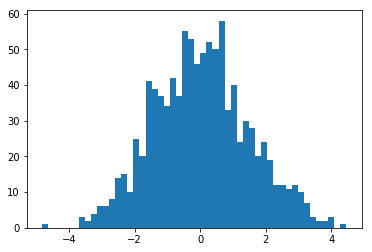

In [0]:
plt.hist(x, bins=50);

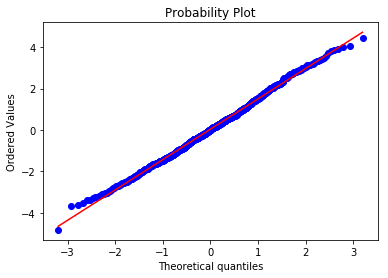

In [0]:
from scipy.stats import probplot, norm
fig, ax = plt.subplots(1, 1)
prob1 = probplot(x, dist=norm, plot=ax)

---

## Feature Scaling and Normalization

### Min-Max Scaling

Min-max scaling squeezes (or stretches) all feature values to be within the range of [0,1].

$\hat{x} = \frac{x - min(x)}{max(x) - min(x)}$

### Standardization (Variance Scaling)

$\hat{x} = \frac{x-mean(x)}{\sqrt{var(x)}}$

!!!DON'T "CENTER" SPARSE DATA!!!

Bag-of-words is a sparse representation, and most classification libraries optimize for sparse inputs.

### $l^2$ Normalization

It normalizes (divides) the original feature value by the euclidean norm.

$\hat{x} = \frac{x}{||x||_2}$

Scaling does not change the shape of the single-feature distribution

Feature scaling is useful in situations where a set of input features differs wildly in scale.

## Interaction Features

- A simple pairwise interaction feature is the product of two features.
- Decision tree-based model getthis for free, but generalized linear models often find interaction features very helpful.
- This allows us to capture interactions between features, and hence these pairs called interaction features.
- If x and x are binary, then their product x1x2 is the
logical function x1 AND x2.
- Very simple to formulate, but they very expensive to use.
- Ways for the expensive computation:
    - Perform feature selection on top of all of the interaction features. Selecting the best features for a problem.    

---

## Feature Selection

- Prune away nonuseful features in order to reduce the complexity of the resulting model.
- In
order to arrive at such a model, some feature selection techniques require
training more than one candidate model.

Roughly speaking, feature selection falls into three classes:

Filter

Filtering techniques preprocess features to remove ones that are unlikely to
be useful for the model. For example, one could compute the correlation or
mutual information between each feature and the response variable, and filter
out the features that fall below a threshold. It is best to do prefiltering conservatively, so as not to
inadvertently eliminate useful features before they even make it to the model
training step.



Wrapper methods

These techniques are expensive, but they allow you to try out subsets of
features, which means you won’t accidentally prune away features that are
uninformative by themselves but useful when taken in combination. The
wrapper method treats the model as a black box that provides a quality score
of a proposed subset for features. There is a separate method that iteratively
refines the subset.

Embedded methods

These methods perform feature selection as part of the model training
process. For example, a decision tree inherently performs feature selection
because it selects one feature on which to split the tree at each training step. Another example is l1 regularization. Compared to filtering,
embedded methods select features that are specific to the model. In this
sense, embedded methods strike a balance between computational expense
and quality of results.